In [ ]:
%matplotlib inline

In [ ]:
from __future__ import print_function
import os
import sys
import time

sys.path.append('/afs/crc.nd.edu/user/a/awoodard/releases/np-fit-production/CMSSW_7_4_7/python')
sys.path.append('/afs/crc.nd.edu/user/a/awoodard/.local/lib/python2.7/site-packages/')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.ticker as ticker

In [ ]:
from NPFitProduction.NPFitProduction.cross_sections import parse_lhe_weights, CrossSectionScan

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
tweaks = {
    "legend.fontsize": "x-large",
    "legend.edgecolor": "white",
    "legend.facecolor": "white",
    "axes.labelsize": "x-large",
    "axes.titlesize": "x-large",
    "xtick.labelsize": "large",
    "xtick.major.size": 5,
    "ytick.major.size": 5,
    "ytick.labelsize": "large",
}
plt.rc(tweaks)

In [28]:
tag = 'reweight_v9'
tag = 'reweight_v10'


tag = 'reweight_v16'
coefficients = ['cuB', 'cuG']

tag = 'reweight_v17'
coefficients = ['cuB', 'cuG', 'c3G']

tag = 'reweight_v19'
coefficients = ['cuB', 'cuG', 'c3G', 'cHu']

tag = 'reweight_v21'
coefficients = ['cHu', 'cuB', 'cuG', 'c3G', 'tc3G']

tag = 'reweight_v22'
coefficients = ['cuB', 'cuG', 'c3G', 'cHu', 'tc3G', 'cH']

tag = 'reweight_v24'
coefficients = ['cuB', 'cH', 'tc3G', 'c3G', 'cHu', 'c2G', 'cuG']

tag = 'reweight_v15'

tag = 'reweight_v14'
coefficients = ['cuB']

tag = 'reweight_v25'
tag = 'reweight_v20'
coefficients = ['cuW', 'cuB', 'cH', 'tc3G', 'c3G', 'cHu', 'c2G', 'cuG']

outdir = '/afs/crc.nd.edu/user/a/awoodard/www/.private/ttV/' + tag
lhe = '/afs/crc.nd.edu/user/a/awoodard/np-fit-production/test/{}/processtmp/Events/run_01/unweighted_events.lhe'.format(tag)

In [29]:
indices = dict((c, i) for i, c in enumerate(coefficients))

if not os.path.isdir(outdir):
    os.makedirs(outdir)

In [30]:
scan = CrossSectionScan("/afs/crc.nd.edu/user/a/awoodard/np-fit-production/data/8d.npz")

`weights`: each row corresponds to an event, each column corresponds to a point

`points`: each row corresponds to a point, each column corresponds to a coefficient

In [31]:
start_values, points, weights = parse_lhe_weights(lhe, coefficients)

parsing /afs/crc.nd.edu/user/a/awoodard/np-fit-production/test/reweight_v20/processtmp/Events/run_01/unweighted_events.lhe
will process 168 points in 100000 events
completed 0 / 100000 events
completed 10000 / 100000 events
completed 20000 / 100000 events
completed 30000 / 100000 events
completed 40000 / 100000 events
completed 50000 / 100000 events
completed 60000 / 100000 events
completed 70000 / 100000 events
completed 80000 / 100000 events
completed 90000 / 100000 events


In [24]:
test = [i for i in range(1, len(points)) if i % 10 == 0]
train = [i for i in range(1, len(points)) if i % 10 != 0]

errs = np.zeros((len(weights), len(points)))
fits = np.zeros((len(weights), len(points)))
start = time.time()
for event in range(len(weights)):
    constants, _, _, _ = np.linalg.lstsq(scan.model(points[train]), weights[event][train])
    fit = np.dot(scan.model(points), constants)
    mg = weights[event]

    errs[event] = (mg - fit) / mg * 100
    fits[event] = fit

print('finished {} {} dimensional fits to {} points in {} seconds'.format(
    len(weights),
    points.shape[1],
    len(points[train]),
    int(time.time() - start))
)

finished 100000 1 dimensional fits to 154 points in 58 seconds


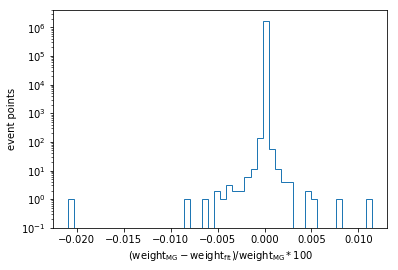

In [25]:
plt.hist(errs[:,test].ravel(), 50, histtype='step', log=True, fill=False)
plt.xlabel('$(\mathrm{weight}_{\mathrm{MG}} - \mathrm{weight}_{\mathrm{fit}}) / \mathrm{weight}_{\mathrm{MG}} * 100$')
plt.ylabel('event points')

plt.savefig(os.path.join(outdir, 'errs.pdf'), bbox_inches='tight')

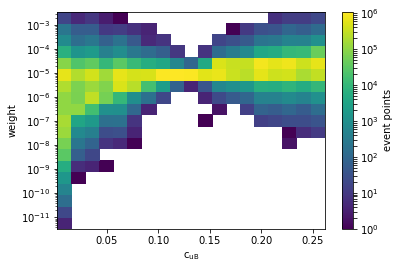

In [26]:
x = np.concatenate([points[:, indices['cuB']] for i in weights]).ravel()
y = weights.ravel()
bins = [
    np.linspace(x.min(), x.max(), 20),
    np.logspace(np.log10(y.min()), np.log10(y.max()), 20)
]

plt.yscale('log')
H, xedges, yedges = np.histogram2d(x, y, bins=bins)
plt.pcolormesh(xedges, yedges, H.T, norm=LogNorm())

plt.xlabel('$\mathrm{c}_\mathrm{uB}$')
plt.ylabel('weight')
plt.colorbar(label='event points')
plt.savefig(os.path.join(outdir, 'cuB_vs_weight.pdf'), bbox_inches='tight')

Above is the projection from the 8-dimensional space onto the cuB axis.

[array([ 0.009547  ,  0.02252921,  0.03551142,  0.04849363,  0.06147584,
        0.07445805,  0.08744026,  0.10042247,  0.11340468,  0.12638689,
        0.13936911,  0.15235132,  0.16533353,  0.17831574,  0.19129795,
        0.20428016,  0.21726237,  0.23024458,  0.24322679,  0.256209  ]), array([  8.22197640e-13,   2.90178057e-12,   1.02412487e-11,
         3.61444196e-11,   1.27564432e-10,   4.50212907e-10,
         1.58893556e-09,   5.60782727e-09,   1.97916942e-08,
         6.98507888e-08,   2.46524257e-07,   8.70057593e-07,
         3.07069262e-06,   1.08373896e-05,   3.82483787e-05,
         1.34989931e-04,   4.76419707e-04,   1.68142717e-03,
         5.93425773e-03,   2.09437646e-02])]


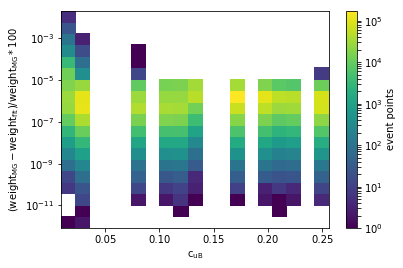

In [27]:
x = np.concatenate([points[test][:, indices['cuB']] for i in errs[:, test]]).ravel()
y = np.abs(errs[:, test]).ravel()

bins = [
    np.linspace(x.min(), x.max(), 20),
    np.logspace(np.log10(y.min()), np.log10(y.max()), 20)
]
print(bins)

plt.yscale('log')
H, xedges, yedges = np.histogram2d(x, y, bins=bins)
plt.pcolormesh(xedges, yedges, H.T, norm=LogNorm())
plt.xlabel('$\mathrm{c}_\mathrm{uB}$')
plt.ylabel('$(\mathrm{weight}_{\mathrm{MG}} - \mathrm{weight}_{\mathrm{fit}}) / \mathrm{weight}_{\mathrm{MG}} * 100$')
plt.colorbar(label='event points')
plt.savefig(os.path.join(outdir, 'cuB_vs_err.pdf'), bbox_inches='tight')

Note that the plot above only uses test points which were not included in the fit. The blank vertical bars correspond to the `train` points which were included in the fit.

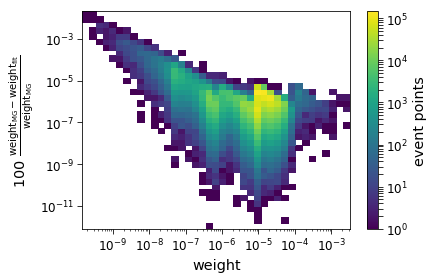

In [14]:
x = weights[:, test].ravel()
y = np.abs(errs[:, test].ravel())

bins = [
    np.logspace(np.log10(x.min()), np.log10(x.max()), 40),
    np.logspace(np.log10(y.min()), np.log10(y.max()), 40)
]

with plt.rc_context(tweaks):
    plt.xscale('log')
    plt.yscale('log')
    H, xedges, yedges = np.histogram2d(x, y, bins=bins)
    plt.pcolormesh(xedges, yedges, H.T, norm=LogNorm())

    plt.xlabel('weight')
    plt.ylabel('100 $\\frac{\mathrm{weight}_{\mathrm{MG}} - \mathrm{weight}_{\mathrm{fit}}}{\mathrm{weight}_{\mathrm{MG}}}$', fontsize='x-large')
    plt.colorbar(label='event points')
    #plt.title('{}d parameterization'.format(len(coefficients)))
    plt.savefig(os.path.join(outdir, 'weight_vs_err.pdf'), bbox_inches='tight')

The only thing more confusing than a log log plot is a log log log plot.

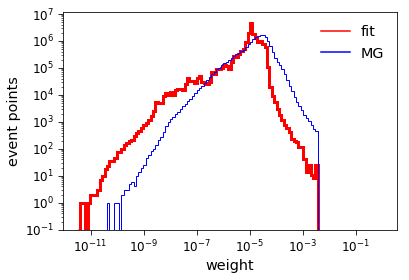

In [32]:
with plt.rc_context(tweaks):
    bins = np.logspace(np.log10(fits.min()), np.log10(fits.max()), 100)

    plt.xscale('log')
    plt.yscale('log')
    plt.hist(fits.ravel(), bins=bins, histtype='step', fill=False, log=True, lw=3, color='red')
    plt.hist(weights.ravel(), bins=bins, histtype='step', fill=False, log=True, color='blue')

    fit_label, = plt.plot([0, 0], color='red')  # hack to show lines instead of boxes in the legend
    mg_label, = plt.plot([0, 0], color='blue')

    plt.xlabel('weight')
    plt.ylabel('event points')
    plt.legend([fit_label, mg_label], ['fit', 'MG'], loc='upper right')

    plt.savefig(os.path.join(outdir, 'fit_and_mg.pdf'), bbox_inches='tight')


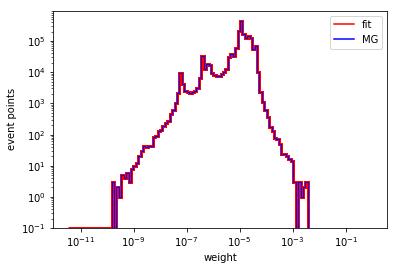

In [16]:
bins = np.logspace(np.log10(fits.min()), np.log10(fits.max()), 100)

plt.xscale('log')
plt.yscale('log')
plt.hist(fits[:, test].ravel(), bins=bins, histtype='step', fill=False, log=True, lw=3, color='red')
plt.hist(weights[:, test].ravel(), bins=bins, histtype='step', fill=False, log=True, color='blue')

fit_label, = plt.plot([0, 0], color='red')  # hack to show lines instead of boxes in the legend
mg_label, = plt.plot([0, 0], color='blue')

plt.xlabel('weight')
plt.ylabel('event points')
plt.legend([fit_label, mg_label], ['fit', 'MG'], loc='upper right')

plt.savefig(os.path.join(outdir, 'fit_and_mg_only_test_points.pdf'), bbox_inches='tight')

fitting ('c2G', 'c3G', 'cH', 'cHu', 'cuB', 'cuG', 'cuW', 'tc3G') ttZ using 4987 points
dimensions  None
fitting ('c2G', 'c3G', 'cH', 'cHu', 'cuB', 'cuG', 'cuW', 'tc3G') ttH using 4987 points
dimensions  None
fitting ('c2G', 'c3G', 'cH', 'cHu', 'cuB', 'cuG', 'cuW', 'tc3G') ttW using 4995 points
dimensions  None


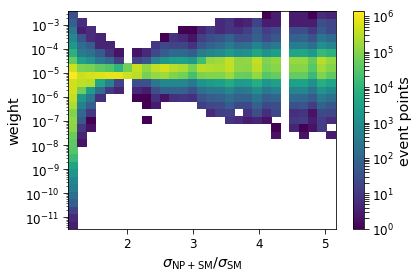

In [17]:
scan.fit()
scan.scales(('c2G', 'c3G', 'cH', 'cHu', 'cuB', 'cuG', 'cuW', 'tc3G'), 'ttZ')
sm = scan.cross_sections['sm']['ttZ']
scales = [sum(weights[:, i]) / sm for i in range(weights.shape[1])]

x = np.concatenate([scales for i in weights]).ravel()
y = weights.ravel()

bins = [
    np.linspace(x.min(), x.max(), 30),
    np.logspace(np.log10(y.min()), np.log10(y.max()), 30)
]

with plt.rc_context(tweaks):
    plt.yscale('log')
    H, xedges, yedges = np.histogram2d(x, y, bins=bins)
    plt.pcolormesh(xedges, yedges, H.T, norm=LogNorm())

    plt.xlabel('$\sigma_\mathrm{NP+SM}/\sigma_\mathrm{SM}$')
    plt.ylabel('weight')
    plt.colorbar(label='event points')
    #plt.xlim(xmax=12)
    plt.savefig(os.path.join(outdir, 'weight_vs_scale.pdf'), bbox_inches='tight')

In the above plot, all of the weights corresponding to each point are added to obtain the total cross section at that point. This plot only means anything if the reweighting makes sense, which remains to be seen.

weights vary between 3e-12 and 4e-03


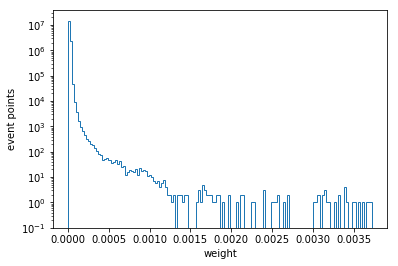

In [18]:
plt.hist(weights.ravel(), 150, histtype='step', log=True, fill=False)
plt.xlabel('weight')
plt.ylabel('event points')

plt.savefig(os.path.join(outdir, 'errs.pdf'), bbox_inches='tight')
print("weights vary between {:.0e} and {:.0e}".format(weights.min(), weights.max()))

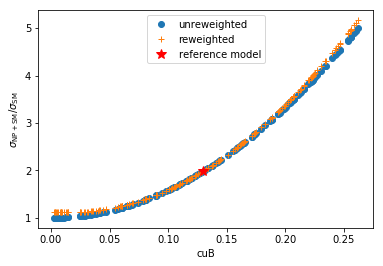

In [19]:
unreweighted = scan.evaluate(coefficients, points, 'ttZ')
reweighted = np.vstack([sum(weights[:, i]) / sm for i in range(weights.shape[1])])

try:
    start_values = start_values.reshape((1, len(start_values)))
except:
    pass

plt.plot(points[:, indices['cuB']].ravel(), unreweighted.ravel(), 'o', linestyle='none', label='unreweighted')
plt.plot(points[:, indices['cuB']].ravel(), reweighted.ravel(), '+', linestyle='none', label='reweighted')
plt.plot(start_values[:, indices['cuB']], scan.evaluate(coefficients, start_values, 'ttZ'), marker='*', markersize=10, linestyle='none', color='red', label='reference model')

plt.ylabel('$\sigma_\mathrm{NP+SM}/\sigma_\mathrm{SM}$')
plt.xlabel('cuB')
plt.legend(loc='upper center')
plt.savefig(os.path.join(outdir, 'unreweighted_and_weighted.pdf'), bbox_inches='tight')

/afs/crc.nd.edu/user/a/awoodard/www/.private/ttV/reweight_v14


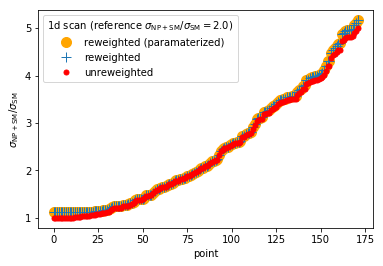

In [20]:
unreweighted = scan.evaluate(coefficients, points, 'ttZ').ravel()
reweighted = np.array([sum(weights[:, i]) / sm for i in range(weights.shape[1])])
reweighted_parameterized = np.array([sum(fits[:, i]) / sm for i in range(weights.shape[1])])

sort = unreweighted.argsort()
index = np.array(list(range(len(sort))))

plt.plot(index, reweighted_parameterized[sort], 'o', linestyle='none', markersize=10, label='reweighted (paramaterized)', color='orange')
plt.plot(index, reweighted[sort], '+', linestyle='none', markersize=10, label='reweighted')
plt.plot(index, unreweighted[sort], '.', linestyle='none', markersize=10, label='unreweighted', color='red')

plt.ylabel('$\sigma_\mathrm{NP+SM}/\sigma_\mathrm{SM}$')
plt.xlabel('point')
plt.legend(loc='upper left', title='{}d scan (reference $\sigma_\mathrm{{NP+SM}}/\sigma_\mathrm{{SM}}={:.1f}$)'.format(points.shape[1], scan.evaluate(coefficients, start_values, 'ttZ')[0]))
plt.savefig(os.path.join(outdir, 'unreweighted_and_weighted_by_point.pdf'), bbox_inches='tight')
print(outdir)
